In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers

import matplotlib.pyplot as plt

# MNIST dataset

Like in the previous case, data of the MNIST dataset is loaded into variables and reshaped to the correct dimension (remembe the shape of the input tensor for image analysis ?). Furthermore, the data is separate into train, validation and test

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype("float32")/255

val_images = train_images[50000:]
val_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

Now we have:

- 50000 images in the training set
- 10000 images in the validation set
- 10000 images in the test set

## Simple architecture

In [3]:
def build_model():
  network = models.Sequential()
  network.add(layers.Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)))
  network.add(layers.MaxPooling2D((2,2)))
  network.add(layers.Conv2D(64,(3,3), activation="relu"))
  network.add(layers.MaxPooling2D((2,2)))
  network.add(layers.Conv2D(64,(3,3), activation="relu"))
  network.add(layers.Flatten())
  network.add(layers.Dense(64,activation="relu"))
  network.add(layers.Dense(10,activation="softmax"))

  network.compile(optimizer="rmsprop",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
  
  network.summary()
  
  return network

Exercises:

1. could you gues the number of parameters that we would have had by using fully connected layers ?
2. how many trainable parameters does this CNN have ?

## Fit model

In [4]:
model = build_model()

history = model.fit(train_images,
                    train_labels,
                    epochs=15,
                    batch_size=64,
                    validation_data=(val_images,val_labels))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("loss = {}\nAcc. = {}".format(test_loss, test_acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss = 0.06568658555960204
Acc. = 0.9912999868392944


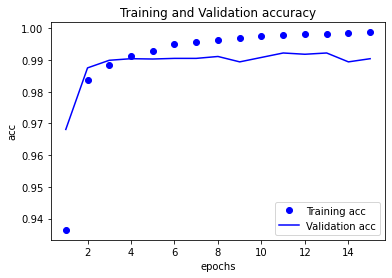

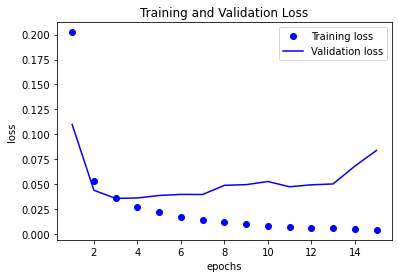

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc  = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs = np.array(range(1,16))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Training and Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.show()
plt.close()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.close()


# Execise

1. **Play with the model**:  change layer size, increse number of layers
2. **Play with the optimizer**: for example change it to Adam
3. change the size of train and validation 
4. check on which images the model doesn't predict the correct value
5. how is the model performing with respect to a Multy Layer Perceptron ?